Mean Absolute Error: $46,219.82
R-squared Score: 0.6793

Feature Importance:
              Feature  Importance
0       median_income    0.620597
1       school_rating    0.103625
3          crime_rate    0.095952
4  population_density    0.065401
2   hospital_distance    0.057674
5        property_age    0.056750


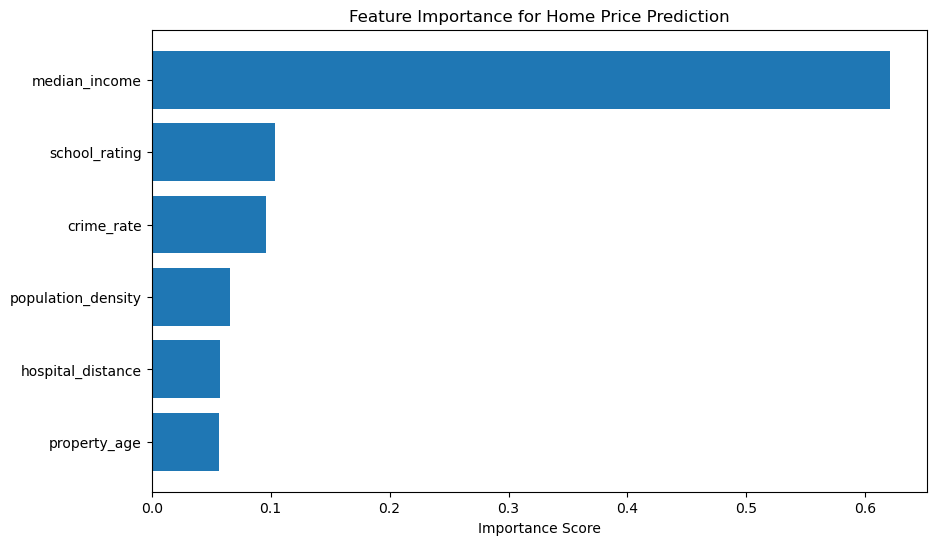

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Sample data generation
def generate_sample_data(num_samples=1000):
    np.random.seed(42)
    data = {
        'median_income': np.random.normal(70000, 15000, num_samples),
        'school_rating': np.random.randint(1, 11, num_samples),
        'hospital_distance': np.random.uniform(0.5, 10, num_samples),
        'crime_rate': np.random.uniform(0.1, 10, num_samples),
        'population_density': np.random.uniform(100, 5000, num_samples),
        'property_age': np.random.randint(1, 100, num_samples)
    }
    
    data['price'] = (
        150000 + 
        data['median_income'] * 5 +
        data['school_rating'] * 10000 -
        data['hospital_distance'] * 5000 -
        data['crime_rate'] * 8000 -
        data['population_density'] * 10 +
        data['property_age'] * 500
    ) + np.random.normal(0, 50000, num_samples)
    
    return pd.DataFrame(data)

# Load data
data = generate_sample_data()
X = data.drop('price', axis=1)
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# Feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance for Home Price Prediction')
plt.gca().invert_yaxis()
plt.show()